In [29]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from sympy.abc import *
from sympy import *
init_printing()

In [30]:
def P(l, m, x):
    pmm = Number(1)
    if m > 0:
        somx2 = sqrt(1-x**2)
        fact = Number(1)
        for i in range(1, m+1):
            pmm *= -fact * somx2
            fact += 2
    if l == m:
        return pmm.simplify()
    pmmp1 = x * (2*m+1) * pmm
    if l == m+1:
        return pmmp1.simplify()
    pll = Number(0)
    for ll in range(m+2, l+1):
        pll = ((2*ll-1) * x * pmmp1 - (ll+m-1) * pmm) / (ll-m)
        pmm = pmmp1
        pmmp1 = pll
    return pll.simplify()

In [42]:
def K(l, m):
    return sqrt(((2*l+1)/(4*pi))*(factorial(l-m)/factorial(l+m))).simplify()

In [43]:
def SH(l, m, theta, phi):
    if m > 0:
        return sqrt(2)*K(l,m)*cos(m*phi)*P(l,m,cos(theta))
    elif m < 0:
        return sqrt(2)*K(l,-m)*sin(-m*phi)*P(l,-m,cos(theta))
    else:
        return K(l,m)*P(l,m,cos(theta))

In [44]:
def polar_to_vec(theta, phi):
    return cos(theta)*sin(phi), sin(theta)*sin(phi), cos(phi)
def vec_to_polar(x, y, z):
    return atan(y/x), acos(z)

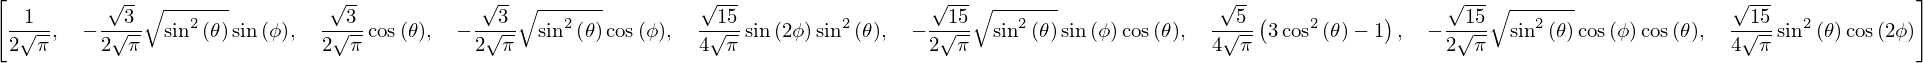

In [65]:
SHs = []
for l in range(3):
    for m in range(-l, l+1):
        SHs.append(SH(l, m, theta, phi).simplify())
SHs

In [66]:
SHs_dtheta = [sh.diff(theta).simplify() for sh in SHs]

In [67]:
SHs_dphi = [sh.diff(phi).simplify() for sh in SHs]

<IPython.core.display.Javascript object>


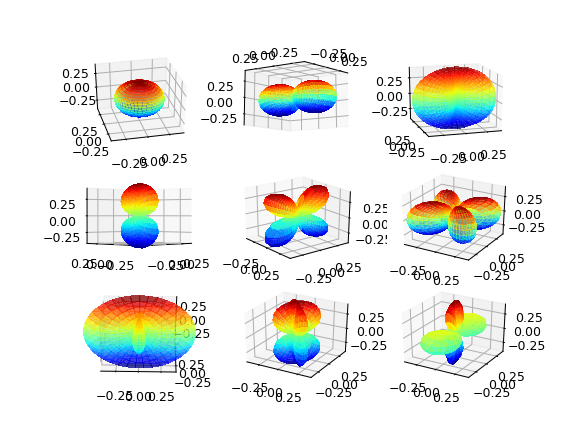

In [69]:
fig = plt.figure()
theta_, phi_ = [np.linspace(0, 1, 40) for _ in range(2)]
theta_, phi_ = 2*np.arccos(np.sqrt(1-theta_)), 2*np.pi*phi_
THETA, PHI = np.meshgrid(theta_, phi_)
plot_dim = int(len(SHs)**0.5)
plot_lim = 0.4
for i in range(len(SHs)):
    lambda_sh = lambdify((theta,phi), SHs[i])
    R = lambda_sh(THETA, PHI)
    R = abs(R)
    X = R * np.cos(THETA) * np.sin(PHI)
    Y = R * np.sin(THETA) * np.sin(PHI)
    Z = R * np.cos(PHI)
    ax = fig.add_subplot(plot_dim,plot_dim,i+1, projection='3d')
    ax.set_xlim((-plot_lim,plot_lim))
    ax.set_ylim((-plot_lim,plot_lim))
    ax.set_zlim((-plot_lim,plot_lim))
    ax.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
        linewidth=0, antialiased=False, alpha=0.5)
plt.show()